In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
img = cv2.imread('/Users/qiaoye/Desktop/3.jpeg')
img.shape

(480, 720, 3)

### 直方图 

`cv2.calcHist(image,channels,mask,histSize,ranges)`

- img：原图格式为uint8 或者 float32，当传入函数时应用中括号[]例如[img]
- channels: 同样用中括号，如果入图像是灰度图他的值就是[0]如果是彩色图像的传入的参数可以是[0][1][2]他们分别对应着BGR
- mask:掩膜图像，如果是希望统计的是一部分的图像的话就传入他
- histSize :BIN 的数目，也应用中括号括起来
- ranges： 像素值的范围为[0,255]

In [5]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape


(256, 1)

(array([3.000e+00, 5.000e+00, 5.000e+00, 5.000e+00, 1.000e+01, 1.200e+01,
        1.400e+01, 1.500e+01, 3.700e+01, 4.200e+01, 9.300e+01, 9.700e+01,
        1.150e+02, 1.800e+02, 2.520e+02, 3.100e+02, 3.800e+02, 4.180e+02,
        4.170e+02, 4.660e+02, 4.970e+02, 4.660e+02, 5.730e+02, 6.610e+02,
        7.620e+02, 0.000e+00, 7.310e+02, 8.090e+02, 9.090e+02, 9.360e+02,
        1.051e+03, 1.133e+03, 1.137e+03, 1.167e+03, 1.256e+03, 1.481e+03,
        1.530e+03, 1.303e+03, 1.197e+03, 1.260e+03, 1.331e+03, 1.338e+03,
        1.663e+03, 1.709e+03, 1.689e+03, 1.425e+03, 1.419e+03, 1.553e+03,
        1.794e+03, 1.903e+03, 2.020e+03, 0.000e+00, 1.949e+03, 1.665e+03,
        1.764e+03, 1.919e+03, 2.435e+03, 2.970e+03, 3.345e+03, 2.753e+03,
        2.328e+03, 2.350e+03, 2.600e+03, 2.864e+03, 3.065e+03, 3.112e+03,
        2.521e+03, 2.119e+03, 2.195e+03, 2.557e+03, 3.029e+03, 3.289e+03,
        3.394e+03, 3.025e+03, 2.695e+03, 2.517e+03, 0.000e+00, 2.786e+03,
        3.118e+03, 3.528e+03, 3.706e+0

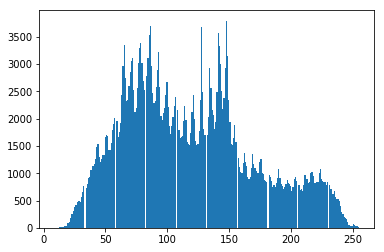

In [7]:
plt.hist(img.ravel(),256)

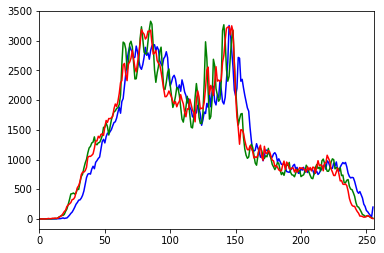

In [9]:
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

#### mask 操作

In [15]:
# 创建mask
mask = np.zeros(img.shape[::2],np.uint8)
mask[100:300,100:400] = 255
mask.shape
cv2.imshow(mask)

TypeError: imshow() missing required argument 'mat' (pos 2)

#### 与操作

In [11]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(masked_img)

error: OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [12]:
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.imshow(hist_mask)

error: OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/histogram.cpp:166: error: (-215:Assertion failed) mask.size() == imsize && mask.channels() == 1 in function 'histPrepareImages'


#### 直方图均衡化

直方图均衡就是吧原来的图像的像素点，做的更加均衡和平衡点，不会那点特别的大或者特别的小

<function matplotlib.pyplot.show(*args, **kw)>

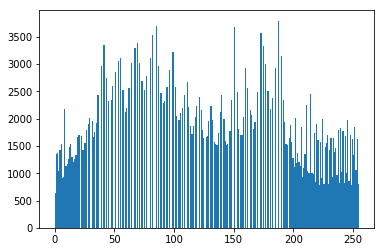

In [19]:
img = cv2.imread('/Users/qiaoye/Desktop/3.jpeg',0) # 需要传入的是单通道的图片
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256)
plt.show

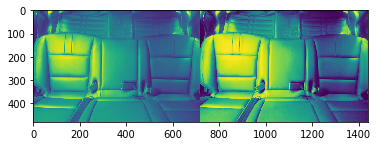

In [24]:
res = np.hstack((img,equ))
plt.imshow(res)

自适应直方图均衡化

把大图换成小图，然后再做均衡化

In [25]:
clahe = cv2.createCLAHE(clipLimit = 2.0,tileGridSize=(8,8))


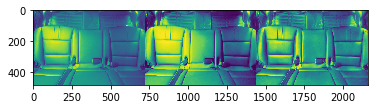

In [26]:
res_clahe = clahe.apply(img)
res = np.hstack((img,equ,res_clahe))
plt.imshow(res)

### 傅里叶变换

我们生活在时间的世界里，早上7：00起床，8：00去乘地铁，9：00开始上班。。。。。

以时间为参照就是时域的分析

但是在频域中一切都是静止的

### 傅里叶变换的作用

- 高频，变化剧烈的灰度分量，例如边界
- 低频，变化缓慢的灰度分量，例如一片大海

### 滤波

- 低通滤波器，只保留低频，会使得图像变的模糊
- 高通滤波器：只保留高频，会使得图像细节增强




- OpenCV中主要就是cv2.dft(),输入图像需要先转换成np.float32格式
- 得到的结果中频率为0的部分会在左上角，通常要转换到中心位置，可以通过shift变换来实现
- cv2.dft()返回的结果是双通道的，（实部和虚部）通常还需要转换成图像格式才能显示（0，255）

In [27]:
import numpy as np
import cv2


In [ ]:
img = cv2.imread('/Users/qiaoye/Desktop/3.jpeg',0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft) #得到灰度图的表现形式

